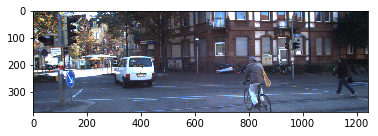

(375, 1242)


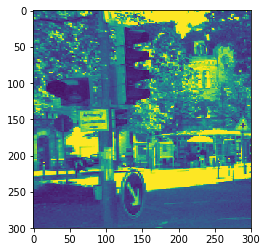

(40000, 3)
(3, 40000)
2
2
0.00460004806519


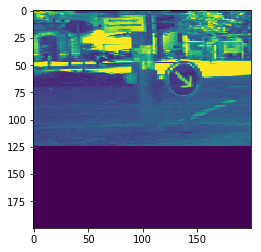

In [3]:
import numpy as np
from scipy import interpolate
# x = np.arange(-5.01, 5.01, 0.25)
# y = np.arange(-5.01, 5.01, 0.25)
# xx, yy = np.meshgrid(x, y)
# z = np.sin(xx**2+yy**2)
# f = interpolate.interp2d(x, y, z, kind='cubic')

from PIL import Image
import matplotlib.pyplot as plt
img = np.asarray(Image.open('/home/ray/Data/KITTI/training/image_02/0000/000000.png'))
plt.imshow(img)
plt.show()

# 0) create the interpolant
single_dim = img[:,:,0]
print single_dim.shape

x = np.arange(0,img.shape[0])
y = np.arange(0,img.shape[1])
f = interpolate.interp2d(y, x, single_dim, kind='cubic')

xnew = np.arange(0, 300)
ynew = np.arange(0, 300)
znew = f(xnew, ynew)
plt.imshow(znew)
plt.show()

from image.affine import Affine
# 1) Create Affine
at = Affine()
at.append(Affine.translation([-126,0]))
at.append(Affine.scaling([0.5,1.0]))
#at.append(Affine.rotation(0.1))
import time
t0 = time.time()

# 2) create output grid to sample at
output_size = [200,200]
px,py = np.mgrid[0:output_size[0]:1,0:output_size[1]:1]
points = np.c_[px.ravel(), py.ravel()]
points_aug = np.concatenate((points,np.ones((points.shape[0],1))),axis=1)
print points_aug.shape

# 3) compute inverse transform to find the input points to sample
inv_points = np.dot(at.inverse,points_aug.T)
print inv_points.shape
# print inv_points[0,0:1000]

# 4) now we have the inverted points, is there a fast way to apply f onto these points??
# znew = f(inv_points[0,0:10],inv_points[1,0:10])

# 5) instead of using the interpolant, use map_coords to sample
from scipy.ndimage.interpolation import map_coordinates
coords = inv_points[0:2,:]
print coords.shape[0]
print single_dim.ndim
outs = map_coordinates(single_dim,coords,order=1)
print time.time()-t0

plt.imshow(outs.reshape(output_size))
plt.show()


In [2]:
from image.affine import Affine
at = Affine()
at.append(Affine.translation([50,50]))

at.inverse

In [46]:
import time
t0 = time.time()
# np.meshgrid([0,1,2],[4,5])
px,py = np.mgrid[0:3:1,4:6:1]
points = np.c_[px.ravel(), py.ravel()]
print time.time() - t0
points

0.000318050384521


array([[0, 4],
       [0, 5],
       [1, 4],
       [1, 5],
       [2, 4],
       [2, 5]])

In [64]:
import time
t0 = time.time()
X2D,Y2D = np.meshgrid(np.arange(0,600,1),np.arange(0,400,1))
out = np.column_stack((Y2D.ravel(),X2D.ravel()))
print time.time() - t0
print np.ones((out.shape[0],1)).shape
out1 = np.concatenate((out,np.ones((out.shape[0],1))),axis=1)
out1.T

0.00586891174316
(240000, 1)


array([[   0.,    0.,    0., ...,  399.,  399.,  399.],
       [   0.,    1.,    2., ...,  597.,  598.,  599.],
       [   1.,    1.,    1., ...,    1.,    1.,    1.]])